In [70]:
import os
import torch
import torchvision
import torchvision.transforms as transforms

from PIL import Image
import torch.nn as nn





In [71]:

import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [72]:
import os
data_dir = r'C:\Users\Code212-PC10\Downloads\dataset-20250226T131930Z-001\dataset'
print("Exists:", os.path.exists(data_dir))



Exists: True


In [73]:
fresh_apples = os.listdir(data_dir + '/Train/freshapples')

print('No of test samples for apples : ', len(fresh_apples))

No of test samples for apples :  2424


In [77]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

import torchvision.transforms as transforms


from torchvision import datasets

transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),  # Resize while keeping aspect ratio
    transforms.RandomHorizontalFlip(p=0.5),  # Flip with 50% probability
    transforms.RandomAffine(degrees=15, translate=(0.1, 0.1), shear=10),  # Rotation, translation, shear
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Color variations
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.2), ratio=(0.3, 3.3)),  # Cutout-like effect
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Standard normalization
])


dataset = ImageFolder(data_dir+'/Train', transform=transform)

img,label = dataset[2]

print(img.shape, label)
img

torch.Size([3, 224, 224]) 0


tensor([[[2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
         [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
         [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
         ...,
         [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
         [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
         [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489]],

        [[2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
         [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
         [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
         ...,
         [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
         [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
         [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286]],

        [[2.6400, 2.6400, 2.6400,  ..., 2.6400, 2.6400, 2.6400],
         [2.6400, 2.6400, 2.6400,  ..., 2.6400, 2.6400, 2.6400],
         [2.6400, 2.6400, 2.6400,  ..., 2.6400, 2.6400, 2.

In [35]:
print(dataset.classes)

['freshapples', 'freshbanana', 'freshbittergroud', 'freshcapsicum', 'freshcucumber', 'freshokra', 'freshoranges', 'freshtomato', 'rottenapples', 'rottenbanana', 'rottenbittergroud', 'rottencapsicum', 'rottencucumber', 'rottenokra', 'rottenoranges', 'rottenpotato', 'rottentomato']


In [36]:
import matplotlib.pyplot as plt

def show_sample(img,label) :
  print('Label : ', dataset.classes[label], '('+str(label)+')')
  plt.imshow(img.permute(1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0322802..1.733682].


Label :  freshapples (0)


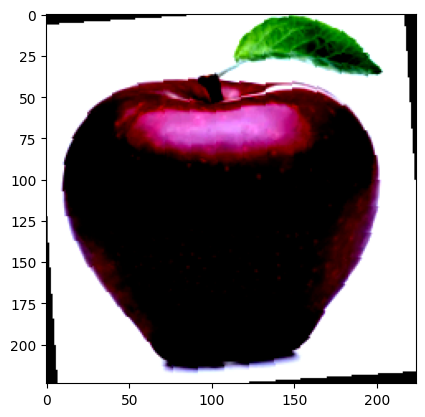

In [37]:
show_sample(*dataset[8])

In [38]:
import numpy as np

def split_indices(n,val_pct=0.1,seed=99) :
  n_val = int(val_pct*n)
  np.random.seed(seed)
  idxs =np.random.permutation(n)
  return idxs[n_val:], idxs[:n_val]


In [39]:
val_pct=0.2
rand_seed = 42

train_indices, val_indices = split_indices(len(dataset),val_pct,rand_seed)



In [40]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

batch_size=100

In [41]:


train_sampler = SubsetRandomSampler(train_indices)

train_dl = DataLoader(dataset,batch_size,sampler=train_sampler)

val_sampler = SubsetRandomSampler(val_indices)
val_dl = DataLoader(dataset,batch_size,sampler=val_sampler)

In [42]:
from torchvision.utils import make_grid

def show_batch(dl):
  for images, labels in dl :
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(images,10).permute(1,2,0))
    break


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


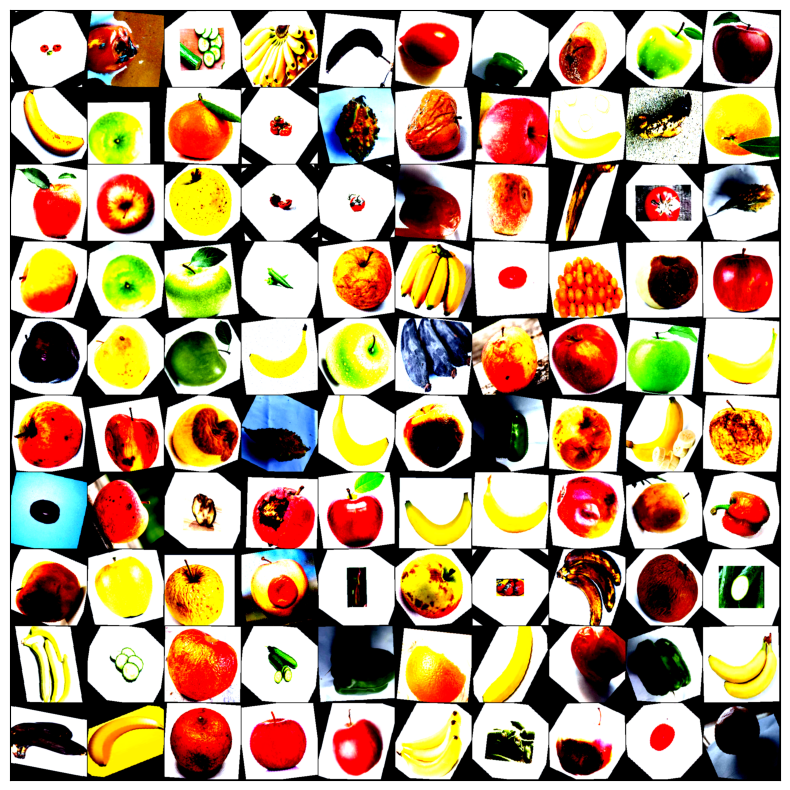

In [43]:
show_batch(val_dl)

In [44]:
import torch.nn as nn
import torch.nn as F

In [45]:
simple_model = nn.Sequential(
    nn.Conv2d(3,8,kernel_size=3,stride=1,padding=1),
    nn.MaxPool2d(2,2)

)

In [46]:
for images,labels in train_dl :
  print('images.shape : ', images.shape)
  out = simple_model(images)
  print('out.shape : ', out.shape)
  break


images.shape :  torch.Size([100, 3, 224, 224])
out.shape :  torch.Size([100, 8, 112, 112])


In [47]:
model = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.BatchNorm2d(32),
    nn.MaxPool2d(2, 2),

    nn.Conv2d(32, 64, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.BatchNorm2d(64),
    nn.MaxPool2d(2, 2),

    nn.Conv2d(64, 128, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.BatchNorm2d(128),
    nn.MaxPool2d(2, 2),

    nn.Conv2d(128, 256, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.BatchNorm2d(256),
    nn.MaxPool2d(2, 2),

    nn.AdaptiveAvgPool2d((1, 1)),  # <== Replaces manual calculation
    nn.Flatten(),
    nn.Dropout(0.5),
    nn.Linear(256, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, len(dataset.classes))
)


In [48]:
model[0].weight.shape

torch.Size([32, 3, 3, 3])

In [49]:
for images, labels in train_dl :
  print('images.shape : ', images.shape)
  out = model(images)
  print('out.shape:', out.shape)
  print('out[0]:', out[0])
  break

images.shape :  torch.Size([100, 3, 224, 224])
out.shape: torch.Size([100, 17])
out[0]: tensor([-0.0308, -0.5021,  0.0951, -0.2746,  0.1156, -0.1330,  0.0396,  0.1349,
         0.1312, -0.4025,  0.8466,  0.2839,  0.3736,  0.0984,  0.3043,  0.5358,
         0.2282], grad_fn=<SelectBackward0>)


In [50]:
import torch
import torch.nn.functional as F

probs = F.softmax(out[0], dim=0)
torch.sum(probs), probs


(tensor(1.0000, grad_fn=<SumBackward0>),
 tensor([0.0486, 0.0303, 0.0551, 0.0381, 0.0562, 0.0439, 0.0521, 0.0573, 0.0571,
         0.0335, 0.1168, 0.0665, 0.0728, 0.0553, 0.0679, 0.0856, 0.0629],
        grad_fn=<SoftmaxBackward0>))

In [51]:
def get_default_device() :
  if torch.cuda.is_available():
    return torch.device('cuda')
  else :
    return torch.device('cpu')

def to_device(data,device) :
  if isinstance(data, (list,tuple)):
    return [to_device(x,device) for x in data]
  return data.to(device,non_blocking=True)

class DeviceDataLoader() :
  def __init__(self, dl, device) :
    self.dl = dl
    self.device = device

  def __iter__(self) :
    for b in self.dl :
      yield to_device(b,self.device)

  def __len__(self) :
    return len(self.dl)





In [52]:
device = get_default_device()

device

device(type='cuda')

In [53]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(val_dl,device)

to_device(model, device)

Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (5): ReLU()
  (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU()
  (10): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (12): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU()
  (14): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (15): MaxPool2d(kernel_size=2, stri

In [54]:
def loss_batch(model, loss_func, xb, yb, opt=None, metric=None):
    preds = model(xb)
    loss = loss_func(preds, yb)

    if opt is not None:
        opt.zero_grad() 
        loss.backward()
        opt.step()

    metric_result = None
    if metric is not None:
        metric_result = metric(preds, yb)
        # Remove duplicate line

    return loss.item(), len(xb), metric_result

In [55]:
def evaluate(model,loss_fn,valid_dl,metric=None) :
  with torch.no_grad() :
    results = [loss_batch(model, loss_fn,xb,yb,metric=metric) for xb,yb in valid_dl]
    losses, nums, metrics  = zip(*results)

    total = np.sum(nums)

    avg_loss = np.sum(np.multiply(losses,nums))/total
    avg_metric = None
    if metric is not None :
      avg_metric = np.sum(np.multiply(metrics,nums)) / total

  return avg_loss, total, avg_metric


In [56]:
def fit(epochs, model, loss_fn, train_dl, valid_dl, opt, scheduler, metric=None, patience=5):
    train_losses, val_losses, val_metrics = [], [], []
    best_val_loss = float('inf')
    counter = 0
    best_model_state = None

    for epoch in range(epochs):
        model.train()
        for xb, yb in train_dl:
            opt.zero_grad()  # Add this line to reset gradients
            train_loss, _, _ = loss_batch(model, loss_fn, xb, yb, opt)

        model.eval()
        result = evaluate(model, loss_fn, valid_dl, metric)
        val_loss, total, val_metric = result

        # Update scheduler
        scheduler.step(val_loss)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_metrics.append(val_metric)

        if metric is None:
            print('Epoch [{}/{}], train_loss: {:.4f}, val_loss: {:.4f}'.format(
                epoch+1, epochs, train_loss, val_loss))
        else:
            print('Epoch [{}/{}], train_loss: {:.4f}, val_loss: {:.4f}, val_{}: {:.4f}'.format(
                epoch+1, epochs, train_loss, val_loss, metric.__name__, val_metric))
        
        # Early stopping logic
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_state = model.state_dict().copy()
            counter = 0
        else:
            counter += 1
            if counter >= patience:
                print(f'Early stopping at epoch {epoch+1}')
                # Restore best model
                model.load_state_dict(best_model_state)
                break

    return train_losses, val_losses, val_metrics

In [57]:
def accuracy(outputs, labels) :
  _, preds = torch.max(outputs,dim=1)
  return torch.sum(preds == labels).item() / len(preds)


In [32]:
val_loss, _ , val_acc = evaluate(model,F.cross_entropy, valid_dl,
                                 metric=accuracy)

print('Loss : {:.4f}, Accuracy : {:.4f}'.format(val_loss, val_acc))

Loss : 2.9037, Accuracy : 0.0445


In [58]:
num_epochs = 20 
opt_fn = torch.optim.Adam
lr = 0.0003 

opt = opt_fn(model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(opt, mode='min', factor=0.1, patience=2)

history = fit(num_epochs, model, F.cross_entropy, train_dl, valid_dl, opt, scheduler, accuracy)
train_losses, val_losses, val_metrics = history

Epoch [1/20], train_loss: 0.9367, val_loss: 0.7723, val_accuracy: 0.7565
Epoch [2/20], train_loss: 0.8592, val_loss: 0.5253, val_accuracy: 0.8206
Epoch [3/20], train_loss: 0.5016, val_loss: 0.4496, val_accuracy: 0.8417
Epoch [4/20], train_loss: 0.5846, val_loss: 0.3306, val_accuracy: 0.8757
Epoch [5/20], train_loss: 0.2685, val_loss: 0.5791, val_accuracy: 0.8143
Epoch [6/20], train_loss: 0.4649, val_loss: 0.2802, val_accuracy: 0.8971
Epoch [7/20], train_loss: 0.2079, val_loss: 0.2480, val_accuracy: 0.9013
Epoch [8/20], train_loss: 0.3282, val_loss: 0.2420, val_accuracy: 0.9034
Epoch [9/20], train_loss: 0.1624, val_loss: 0.1989, val_accuracy: 0.9239
Epoch [10/20], train_loss: 0.4392, val_loss: 0.1937, val_accuracy: 0.9212
Epoch [11/20], train_loss: 0.2274, val_loss: 0.1916, val_accuracy: 0.9257
Epoch [12/20], train_loss: 0.2912, val_loss: 0.2463, val_accuracy: 0.9058
Epoch [13/20], train_loss: 0.1628, val_loss: 0.1886, val_accuracy: 0.9308
Epoch [14/20], train_loss: 0.1761, val_loss: 0.

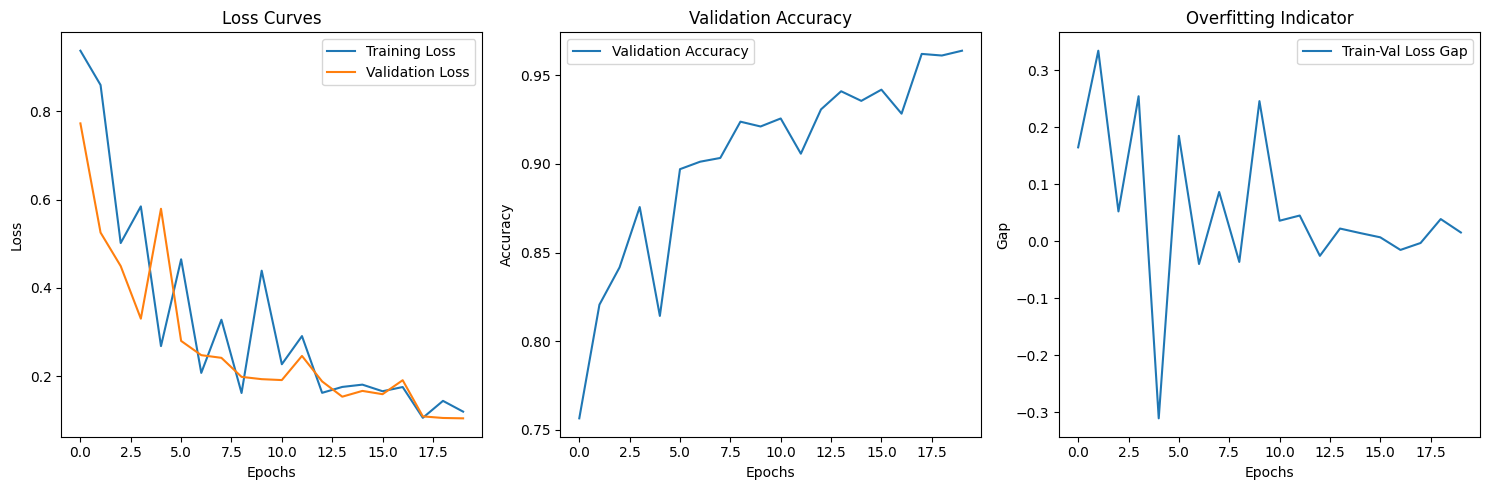

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curves')

plt.subplot(1, 3, 2)
plt.plot(val_metrics, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Validation Accuracy')

# Plot the gap between training and validation loss
plt.subplot(1, 3, 3)
gap = [t - v for t, v in zip(train_losses, val_losses)]
plt.plot(gap, label='Train-Val Loss Gap')
plt.xlabel('Epochs')
plt.ylabel('Gap')
plt.legend()
plt.title('Overfitting Indicator')

plt.tight_layout()
plt.show()

In [60]:
# Save the model
torch.save(model.state_dict(), 'fruit_spoilage_detection_model.pth')



In [61]:
model.load_state_dict(torch.load("fruit_spoilage_detection_model.pth"))
model.eval()  # Set to evaluation mode


C:\Users\Code212-PC10\AppData\Local\Temp\ipykernel_27872\217215697.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("fruit_spoilage_detec

Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (5): ReLU()
  (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU()
  (10): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (12): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU()
  (14): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (15): MaxPool2d(kernel_size=2, stri

In [74]:
# For inference
def predict_image(img_path):
    img = Image.open(img_path).convert('RGB')
    img_tensor = transform(img).unsqueeze(0).to(device)
    model.eval()
    with torch.no_grad():
        output = model(img_tensor)
        _, predicted = torch.max(output, 1)
    return dataset.classes[predicted.item()]

In [81]:
img_path=r"C:\Users\Code212-PC10\Downloads\main_original_59a492209e22f_209219.jpg"

print(predict_image(img_path))

freshbanana
